# Data Visualisation

Before you begin, remember to import the necessary libraries.

In [44]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_theme()

#### Standard Exercises

In [45]:
rndm = pd.DataFrame({'day_number':range(1,90),
                     'pos_trend':np.random.rand(len(range(1,90)))*50 + range(1,90),
                     'neg_trend':np.random.rand(len(range(1,90)))*50 + 25 - range(1,90), })
rndm.head()

,day_number,pos_trend,neg_trend
0,1,9.549135,65.519993
1,2,21.532334,59.782366
2,3,15.566687,54.578954
3,4,40.168730,65.222097
4,5,36.696882,48.491070


1. Given the above DataFrame `rndm`, use Matplotlib to plot a linechart showing the evolution of the `pos_trend` variable. Then, on the same chart, plot also the `neg_trend` column.

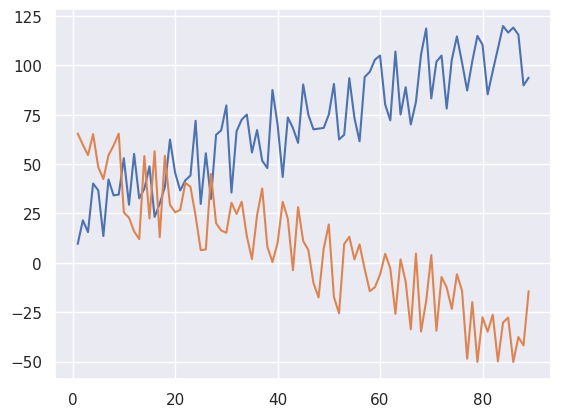

In [46]:
plt.plot(rndm.day_number, rndm.pos_trend)
plt.plot(rndm.day_number, rndm.neg_trend)
plt.show()

2. Add a title, labels for the x- and y-axes and a legend as per the following instructions:
- title: "Direct vs Inverse relationship"
- xlabel: "Days"
- ylabel: "Value"
- legend: label the pos_trend as "direct" and the neg_trend as "inverse"; position it in the "upper left" corner

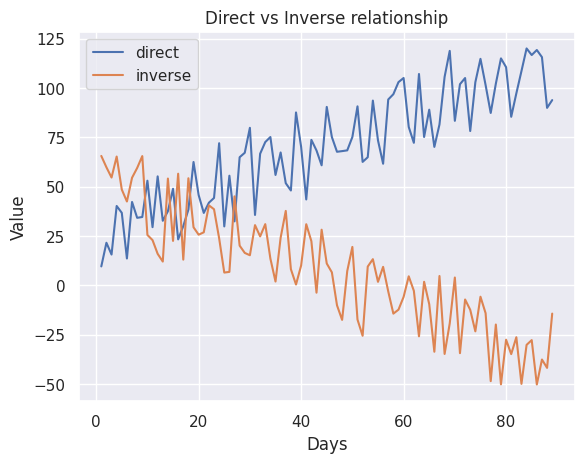

In [47]:
plt.plot(rndm.day_number, rndm.pos_trend, label='direct')
plt.plot(rndm.day_number, rndm.neg_trend, label='inverse')
plt.title('Direct vs Inverse relationship')
plt.xlabel('Days')
plt.ylabel('Value')
plt.legend(loc="upper left")
plt.show()

3. Using the Seaborn library, load the `diamonds` dataset and save it to a DataFrame object named `dd`. Check the contents of the dataset.  

In [48]:
dd = sns.load_dataset('diamonds')
dd.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


4. Create a new DataFrame having the average `carat` and `price` grouped by the `clarity` of the diamond. (hint: check out [this guide](https://4cs.gia.edu/en-us/diamond-clarity/) for a reference on what each clarity category name means. *(hint: the carat of a stone represents its size)*

In [49]:
dd_cut = dd.groupby('clarity', as_index=False)[['carat', 'price']].mean()
dd_cut

,clarity,carat,price
0,IF,0.505123,2864.839106
1,VVS1,0.503321,2523.114637
2,VVS2,0.596202,3283.737071
3,VS1,0.727158,3839.455391
4,VS2,0.763935,3924.989395
5,SI1,0.850482,3996.001148
6,SI2,1.077648,5063.028606
7,I1,1.283846,3924.168691


5. Create a bar chart showing the average `price` per `clarity` category. Then create a second chart showing the average `carat` per `clarity` category. Comment the results of the two charts in relation to the meaning of each clarity category name.

<Axes: xlabel='clarity', ylabel='price'>

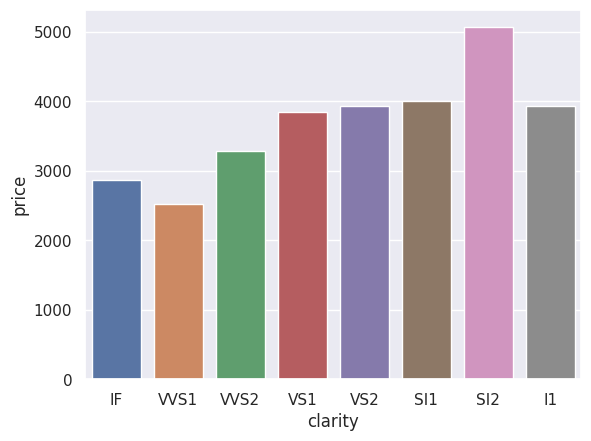

In [50]:
sns.barplot(x='clarity', y='price', data=dd_cut)

<Axes: xlabel='clarity', ylabel='carat'>

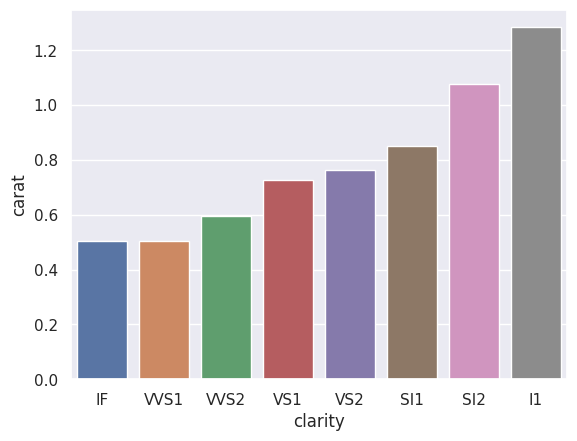

In [51]:
sns.barplot(x='clarity', y='carat', data=dd_cut)

I would've expected to find that more premium stones would have higher average prices, whereas an I1 or an SI2-1 stone has a higher mean price compared to the more premium ones like IF or WS1-2.

This could be explained by the fact that it's more rare to find a large stone without any inclusions, therefore there are on average larger stones of SI1, SI2 or I1 clarity that, although have a poorer quality, have much higher carats and therefore the average stone price increases.

6. Let's investigate this further. Using the `dd` DataFrame, produce a scatterplot showing the relationship between the `carat` (on the x-axis) and the `price` (on the y-axis). Then, use the `clarity` variable to change the color of each circle (that is, of each diamond) in the chart. How can you interpret this chart visually, particularly in relation to the previous point?

<Axes: xlabel='carat', ylabel='price'>

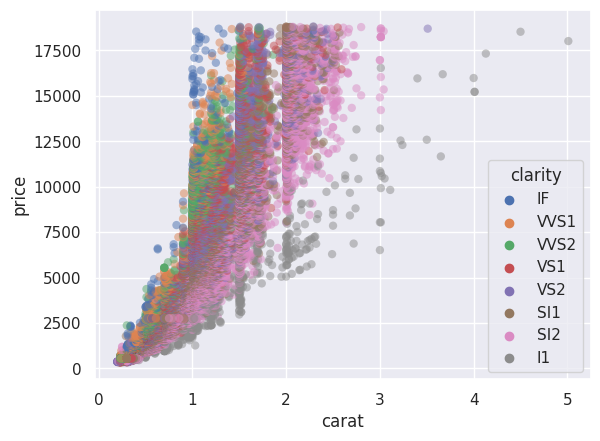

In [52]:
sns.scatterplot(x='carat', y='price', data=dd, hue='clarity', linewidth=0, alpha=0.5)

Yes, from a simple visual analysis we can see that the largest stones (high carat) are the ones with the lowest clarity levels therefore, the larger a stone, the lower the quality. It is not so straightforward to do the same visual analysis on the price, but there are other techniques that could be implemented to check that hypothesis as well, such as looking at densities.

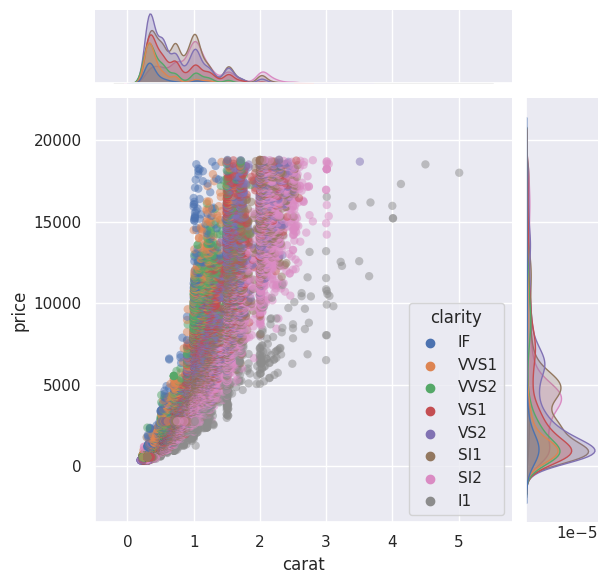

In [53]:
sns.jointplot(x='carat', y='price', data=dd, hue='clarity', linewidth=0, alpha=0.5)

#### Advanced Exercises

You are free to use whichever data visualisation library you prefer, although the Seaborn library is the recommended option.

1. Load the `taxis` dataset from the `seaborn` example dataset repository and call it `taxi`.

In [54]:
taxi = sns.load_dataset('taxis')
taxi.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


2. Depending on the library version you have installed, the data type of the `pickup` and `dropoff` columns, may or may not be interpreted as date-times. Check the data type of the variables in the dataset and in case these are interpreted as strings (object data type), convert those two columns to date-time (remember to assign the result back to the column itself!). *(hint: check out [this Stack Overflow page](https://stackoverflow.com/questions/17134716/convert-dataframe-column-type-from-string-to-datetime) for a tip on how to do it)*

In [58]:
taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           6433 non-null   datetime64[ns]
 1   dropoff          6433 non-null   datetime64[ns]
 2   passengers       6433 non-null   int64         
 3   distance         6433 non-null   float64       
 4   fare             6433 non-null   float64       
 5   tip              6433 non-null   float64       
 6   tolls            6433 non-null   float64       
 7   total            6433 non-null   float64       
 8   color            6433 non-null   object        
 9   payment          6389 non-null   object        
 10  pickup_zone      6407 non-null   object        
 11  dropoff_zone     6388 non-null   object        
 12  pickup_borough   6407 non-null   object        
 13  dropoff_borough  6388 non-null   object        
 14  pickup_date      6433 non-null   object 

In [13]:
taxi['pickup'] = pd.to_datetime(taxi['pickup'])
#taxi['dropoff'] = pd.to_datetime(taxi['dropoff'])
#taxi.info()

Given a date-time column, you can **extract a date-part** from it using the `dt` accessor. Say we wanted to create a new column called `pickup_date` where we [extract the date](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.date.html) from the `pickup` date-time object, we would write (run the cell below):

In [57]:
# run this cell (do not delete)!
taxi['pickup_date'] = taxi['pickup'].dt.date

3. Given what you just read, create:
- a new column named `pickup_weekday` where you [extract the day of the week](https://pandas.pydata.org/docs/reference/api/pandas.DatetimeIndex.weekday.html) from the `pickup` date;
- a new column named `pickup_hour` where you [extract the hour of the day](https://pandas.pydata.org/docs/reference/api/pandas.DatetimeIndex.hour.html)

In [60]:
taxi['pickup_weekday'] = taxi['pickup'].dt.weekday
taxi['pickup_hour'] = taxi['pickup'].dt.hour

4. Create a bar chart that shows the number of rides that happened in each day of the week. Which day of the week is the busiest? *(hint: check out the documentation to find out which number corresponds to which weekday)*

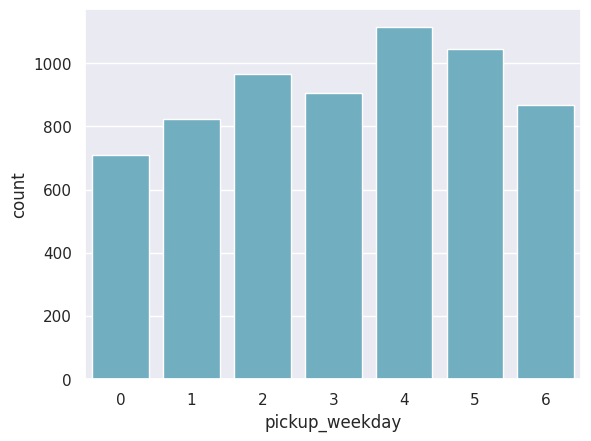

In [61]:
sns.countplot(x='pickup_weekday', data=taxi, color='c')
plt.show()

5. Create a bar chart that shows the number of rides that happened in each hour of the day. Which hour of the day is the busiest?

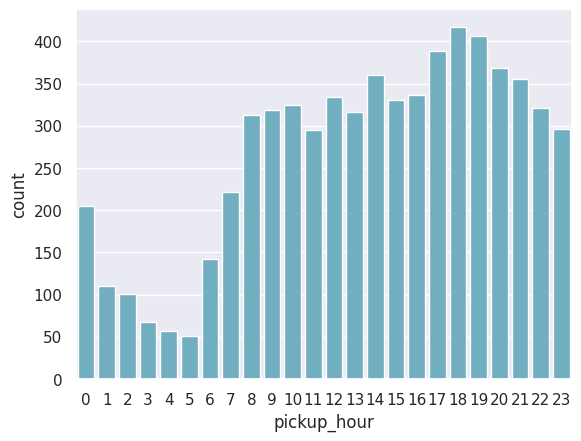

In [62]:
sns.countplot(x='pickup_hour', data=taxi, color='c')
plt.show()

6. Add a new column to the DataFrame called `tip_pct` that is the percentage of the `tip` relative to the `fare`. Then produce a bar chart that shows the average `tip_pct` by `pickup_zone`. Which borough tips the most relative to the fare paid? Would the ranking have changed if we just looked at the absolute tip value?

In [63]:
taxi['tip_pct'] = taxi['tip']/taxi['fare']*100
taxi.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,pickup_date,pickup_weekday,pickup_hour,tip_pct
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,2019-03-23,5,20,30.714286
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan,2019-03-04,0,16,0.000000
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan,2019-03-27,2,17,31.466667
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan,2019-03-10,6,1,22.777778
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan,2019-03-30,5,13,12.222222


In [19]:
taxi.groupby('dropoff_borough', as_index=False)['tip_pct'].mean().sort_values('tip_pct', ascending=False)

,dropoff_borough,tip_pct
4,Staten Island,31.888636
2,Manhattan,18.767564
1,Brooklyn,9.969083
3,Queens,9.576828
0,Bronx,2.577216


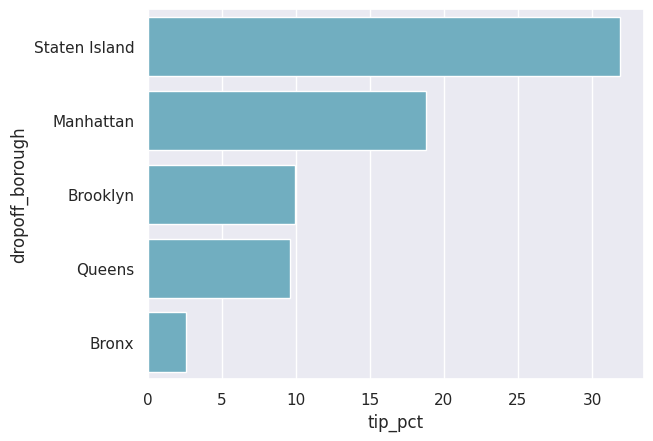

In [65]:
sns.barplot(x='tip_pct', y='dropoff_borough',
            data=taxi.groupby('dropoff_borough', as_index=False)['tip_pct'].mean().sort_values('tip_pct', ascending=False),
            color='c')
plt.show()

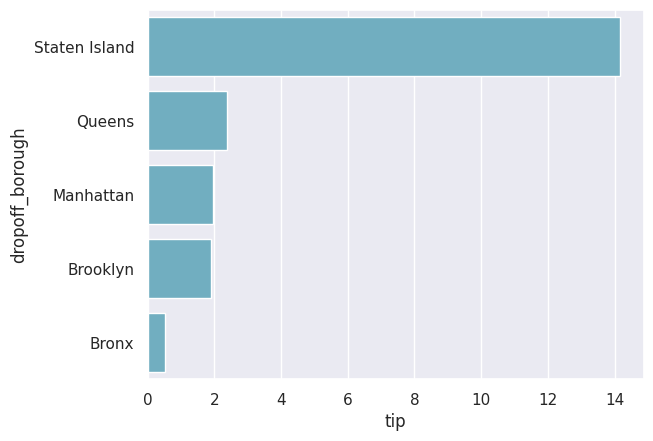

In [21]:
sns.barplot(x='tip', y='dropoff_borough',
            data=taxi.groupby('dropoff_borough', as_index=False)['tip'].mean().sort_values('tip', ascending=False),
            color='c')
plt.show()

7. Create a copy of the `taxi` DataFrame and call it `taxi_tip`. Then filter this new DataFrame so to only keep rows where the `tip` is greater than 0 (remember to assign the resulting DataFrame to itself in order to save the filtered view).

In [22]:
taxi_tip = taxi.copy()
taxi_tip = taxi_tip[taxi_tip['tip']>0]

8. Create a scatterplot showing the **relationship** between `fare` (on the x-axis) and `tip` (on the y-axis). Give a title to the chart and reset teh x- and y-axis labels to "Ride Fare" and "Ride Tip" respectively.

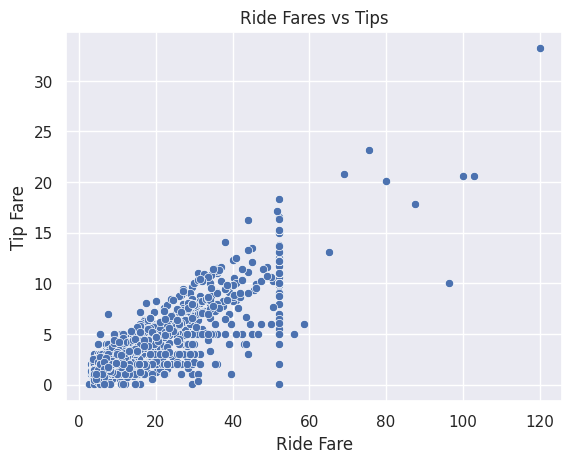

In [23]:
sns.scatterplot(x='fare', y='tip', data=taxi_tip).set(title='Ride Fares vs Tips',
                                                      xlabel='Ride Fare',
                                                      ylabel='Tip Fare')
plt.show()

9. The default settings of the scatterplot draw for each observation a solid circle with a white border. This can be quite heavy on the eye, especially if there are many observations close to each other. Look at the [documentation](https://seaborn.pydata.org/generated/seaborn.scatterplot.html) of the `sns.scatterplot()` function and use the `linewidth` and the `alpha` parameters to remove the white border and increase the transparency of each circle in the chart.

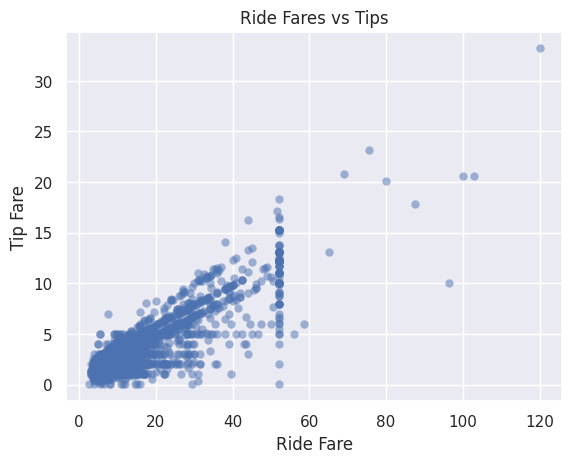

In [24]:
sns.scatterplot(x='fare', y='tip', data=taxi_tip, linewidth=0, alpha=0.5).set(title='Ride Fares vs Tips',
                                                                              xlabel='Ride Fare',
                                                                              ylabel='Tip Fare')
plt.show()

10. Notice that between the Ride Fare values of 50 and 60 dollars, there is a vertical cluster of rides with the same fare amount (and different tip values). What is the exact value of this cluster anomaly? What do you think that is? *(hint: these fares are from NYC taxi rides, try to do a research on Google to see if you can find out more about it)*

In [25]:
taxi_tip[(taxi_tip['fare']>50) & (taxi_tip['fare']<60)]['fare'].value_counts()

52.0    101
50.5      2
56.0      1
51.5      1
58.5      1
Name: fare, dtype: int64

As we can see from [this website](https://www.estimate.taxi/rates/united-states/new-york), there is a flat fee of $52 for a cab ride to and from the JFK airport and any location in Manhattan.